In [5]:
import os
import re
import sys
import glob
import json
import shutil
import cc3d
import mlxtend
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import nibabel as nib
from scipy import stats
import statsmodels.api as sm
from typing import Dict, List
from scipy import stats
from nilearn import plotting
from tqdm.notebook import tqdm
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_linear_regression
import xml.etree.ElementTree as ET

sys.path.append('..')
from misc_utils import *
warnings.filterwarnings("ignore")

In [2]:
meta_info = misc_meta()
with open('/home/socrates/david/tsc/codebase/data/NEW_INTEG.json', 'r') as f:
    NEW_INTEG = json.load(f)

In [3]:
# save_addr = "./new_integ_04292021.csv"
# namechange = {'pred_reg2tp':'pred_inter_both_reg2tp',
#               'pred_reg2tp_thr0.5': 'pred_inter_both_reg2tp_thr0.5',
#               'mask_orig': 'mask_orig1',              
#              }
# ## Aggregate all keys
# all_keys = []
# for mod in NEW_INTEG.keys():
#     for sid in NEW_INTEG[mod].keys():
#         for k in NEW_INTEG[mod][sid].keys():
#             if k not in all_keys:
#                 all_keys.append(k)
#             if k == 'mask_orig':
#                 NEW_INTEG[mod][sid]['mask_orig1'] = NEW_INTEG[mod][sid]['mask_orig']
#                 del NEW_INTEG[mod][sid]['mask_orig']
# ## make a pandas dataframe
# all_keys_update = [namechange[k] if k in namechange.keys()  else k for k in all_keys]
# all_keys_update
# towrite = 'mod,sid,' + ','.join(all_keys_update) + '\n'

# # Save it as a csv file
# for mod in NEW_INTEG.keys():
#     for sid in NEW_INTEG[mod].keys():
#         towrite += '{},{},'.format(mod, sid)
#         togo = []
#         for k in all_keys:
#             if k == 'mask_orig':
#                 continue
#             if k in NEW_INTEG[mod][sid].keys():
#                 togo.append(NEW_INTEG[mod][sid][k])
#             else:
#                 togo.append('empty')
#         towrite += ','.join(togo) + '\n'
            
# with open(save_addr, 'w') as f:
#     f.write(towrite)

In [4]:
save_addr = "./new_integ_04292021.csv"
INTEG_DF = pd.read_csv(save_addr)
select(INTEG_DF, 'mod', 'train')

,mod,sid,FL_orig,T1_orig,T1_reg2FL,FL_brain,T1_reg2FL_brain,mask_FL_brain,mask_orig1,mask_orig2,...,mask_coronal,FL_coronal_brain,mask_FL_coronal_brain,T1_reg2FL_coronal,mat_T12FL_coronal,T1_reg2FL_coronal_brain,mask_cystic_inter,mask_FL_cystic_reg2tp,mask_FL_cystic_reg2tp_thr0.5,pred_inter_cysadded
0,train,10,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,empty,empty,empty,empty
1,train,12,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,empty,empty,empty,empty
2,train,15,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,/home/socrates/david/tsc/codebase/data/train/1...,empty
3,train,20,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,...,empty,empty,empty,empty,empty,empty,empty,empty,empty,empty
4,train,29,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,...,empty,empty,empty,empty,empty,empty,empty,empty,empty,empty
5,train,2,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/train/2...,/home/socrates/david/tsc/codebase/data/t

In [16]:
for idx, line in INTEG_DF.iterrows():
    print(line['mod'])
    break

train


In [72]:
class Results_Figures():
    
    def __init__(self, save_addr):
        self.INTEG = pd.read_csv(save_addr)
        self.result_dir = '../../results'
        
    def correlate_tuber_size_intensity(self, mod = 'train', group = False):
        """
        Print results and figures showing the correlation of tuber size and intensity.
        Inputs:
            mod = ['train', 'test', 'all']
        """
        mean_dir = os.path.join(self.result_dir, 'figures', 'correlate_tuber_size_intensity_mean')
        std_dir = os.path.join(self.result_dir, 'figures', 'correlate_tuber_size_intensity_std')
        makedir(mean_dir)
        makedir(std_dir)
        
        if mod == 'all':
            target_df = self.INTEG
        else:
            target_df = select(self.INTEG, 'mod', mod)
            
        result_dict = {}
        n_tuber_list, pvalue_list = [], []
        group_x, group_y, group_y_std = [], [], []
        for idx, subject in INTEG_DF.iterrows(): 
            
            mask = subject['mask_inter'] if subject['mod'] == 'train' else subject['mask_orig1']
                
            flair, brain_mask = subject['FL_brain'], subject['mask_FL_brain']

            x, y, y_std = [], [], []

            flair_np = znormalize(nib.load(flair).get_fdata())
            mask_np = nonzero_to_one(eye_to_zero(nib.load(mask).get_fdata())).astype('int')
            mask_cc3d = cc3d.connected_components(mask_np)
            n_tuber_list.append(len(np.unique(mask_cc3d)))

            brainmask_file = brain_mask
            brain_voxel, brain_volume = compute_volumn(brainmask_file)          

            for label in np.unique(mask_cc3d)[1:]:

                booled = mask_cc3d==label
                masked_flair = flair_np * booled

                roi_voxel, roi_volume = compute_volumn(brainmask_file, booled)
                assert roi_volume < brain_volume*0.5, 'just to confirm roi is not the background'
                # Average roi
                roi_intensity_mean = masked_flair[masked_flair!=0].mean()
                roi_intensity_std = masked_flair[masked_flair!=0].mean()

                x.append(np.log10(roi_volume))
                y.append(roi_intensity_mean)
                y_std.append(roi_intensity_std)
                group_x.append(np.log10(roi_volume))
                group_y.append(roi_intensity_mean)
                group_y_std.append(roi_intensity_std)
            print('subject id'.format(subject['sid']))
            print('average intensity: {}'.format(np.array(y).mean()))
            
            ## Plotting code - intensity mean ##
            _, ax = plt.subplots(1, 1, figsize=(15, 5))    
            ax.scatter(x=x, y=y)
            ax.set_xlabel(r'$log_{10}$ roi_volume ($mm^3$)')
            ax.set_ylabel('tuber intensity - mean ')    
            
            slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
            pvalue_list.append(p_value)
            
            ax.plot(np.array(x), intercept + slope * np.array(x), 'gray', linestyle='-', label='p value = {:.2e}'.format(p_value))
            ax.legend(fontsize=9)
            
            plt.savefig(os.path.join(mean_dir, 'sid_{}'.format(subject['sid'])))
            
            ## Plotting code - intensity_std ##
            _, ax = plt.subplots(1, 1, figsize=(15, 5))    
            ax.scatter(x=x, y=y_std)
            ax.set_xlabel(r'$log_{10}$ roi_volume ($mm^3$)')
            ax.set_ylabel('reversed tuber intensity - std')    
            
            slope, intercept, r_value, p_value, std_err = stats.linregress(x, y_std)
            pvalue_list.append(p_value)
            
            ax.plot(np.array(x), intercept + slope * np.array(x), 'gray', linestyle='-', label='p value = {:.2e}'.format(p_value))
            ax.legend(fontsize=9)
            plt.savefig(os.path.join(std_dir, 'sid_{}'.format(subject['sid'])))
            
        print('average tuber: {:.2f}'.format(np.array(n_tuber_list).mean()))
        result_dict['ntuber'] = n_tuber_list
        result_dict['pvalue'] = pvalue_list
        
        if group == True:
            
            ## Group plotting code - intensity mean ##
            _, ax = plt.subplots(1, 1, figsize=(15, 5))    
            ax.scatter(x=group_x, y=group_y)
            ax.set_xlabel(r'$log_{10}$ roi_volume ($mm^3$)')
            ax.set_ylabel('tuber intensity - mean ')   
            
            slope, intercept, r_value, p_value, std_err = stats.linregress(group_x, group_y)

            ax.plot(np.array(group_x), intercept + slope * np.array(group_x), 'gray', linestyle='-', label='p value = {:.2e}'.format(p_value))
            ax.legend(fontsize=12)            
            plt.savefig(os.path.join(mean_dir, 'group_level'))
            
            ## Group plotting code - intensity std ##
            _, ax = plt.subplots(1, 1, figsize=(15, 5))
            ax.scatter(x=group_x, y=group_y_std)
            ax.set_xlabel(r'$log_{10}$ roi_volume ($mm^3$)')
            ax.set_ylabel('reversed tuber intensity - std')  
            
            slope, intercept, r_value, p_value, std_err = stats.linregress(group_x, group_y_std)

            ax.plot(np.array(group_x), intercept + slope * np.array(group_x), 'gray', linestyle='-', label='p value = {:.2e}'.format(p_value))
            ax.legend(fontsize=12)
            plt.savefig(os.path.join(std_dir, 'group_level'))

        return result_dict
    
    


In [73]:
Analyzer = Results_Figures(save_addr)

## 1. Correlations between tuber sizes and intensity

### tuber size positively correlated with the intensity mean / std

subject id
average intensity: 2.4341966467240024
subject id
average intensity: 2.8659600682943327
subject id
average intensity: 2.942559434224893
subject id
average intensity: 3.0783315700440625
subject id
average intensity: 2.675746481111022
subject id
average intensity: 2.2288937280426455
subject id
average intensity: 2.6696973677549587
subject id
average intensity: 2.6888955087516693
subject id
average intensity: 2.5316131594870006
subject id
average intensity: 2.531259694301703
subject id
average intensity: 2.114377318346009
subject id
average intensity: 2.9239315627788454
subject id
average intensity: 2.875727364239938
subject id
average intensity: 2.2141207150135327
subject id
average intensity: 2.7221479355089637
subject id
average intensity: 2.8382435822131526
subject id
average intensity: 2.6554639875943185
subject id
average intensity: 2.1744420188296067
subject id
average intensity: 2.2537270670000096
subject id
average intensity: 2.583356246381462
subject id
average intensi

{'ntuber': [54,
  11,
  64,
  25,
  25,
  38,
  24,
  37,
  11,
  54,
  37,
  39,
  21,
  37,
  12,
  13,
  5,
  3,
  29,
  3,
  12,
  32,
  5,
  23,
  12,
  28,
  3,
  37,
  16],
 'pvalue': [1.020465351482054e-05,
  1.020465351482054e-05,
  0.04405083708038326,
  0.04405083708038326,
  0.0010271045252686585,
  0.0010271045252686585,
  9.36394481835255e-06,
  9.36394481835255e-06,
  0.16077818043674424,
  0.16077818043674424,
  0.08507357927756194,
  0.08507357927756194,
  0.8032216821053569,
  0.8032216821053569,
  0.024952902002828976,
  0.024952902002828976,
  0.4777740869417151,
  0.4777740869417151,
  9.991669988699833e-05,
  9.991669988699833e-05,
  0.8143872912375454,
  0.8143872912375454,
  0.6342220384295034,
  0.6342220384295034,
  0.6274067701251046,
  0.6274067701251046,
  4.606295984711346e-05,
  4.606295984711346e-05,
  0.007183597015258567,
  0.007183597015258567,
  0.10504186715193617,
  0.10504186715193617,
  0.7522051682494895,
  0.7522051682494895,
  0.0,
  0.0,
  0.

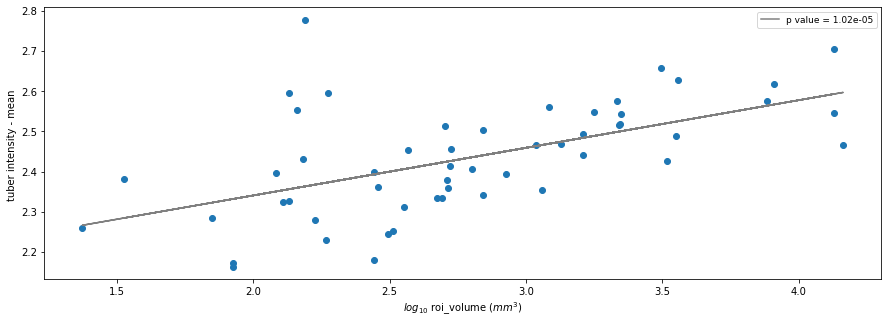

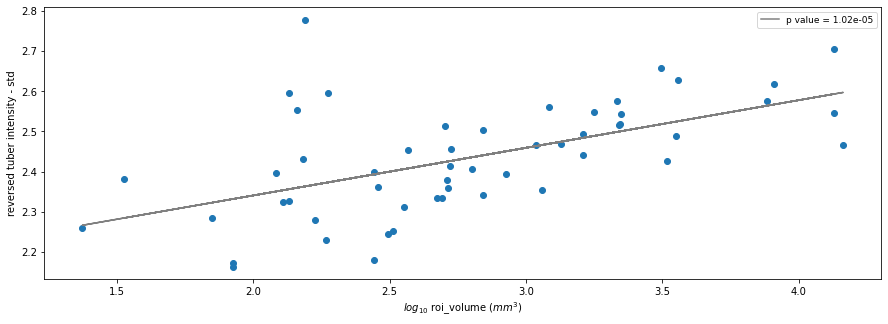

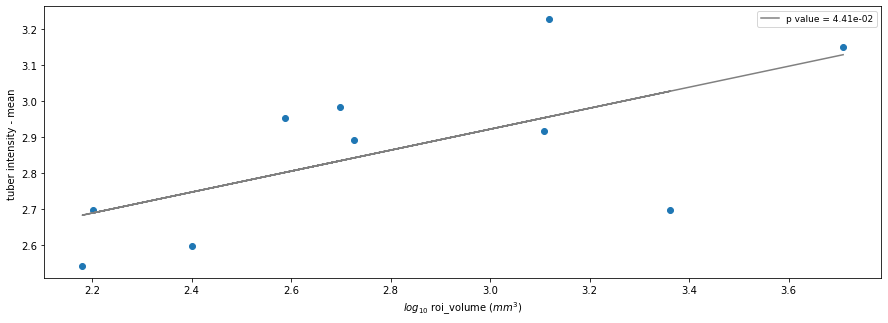

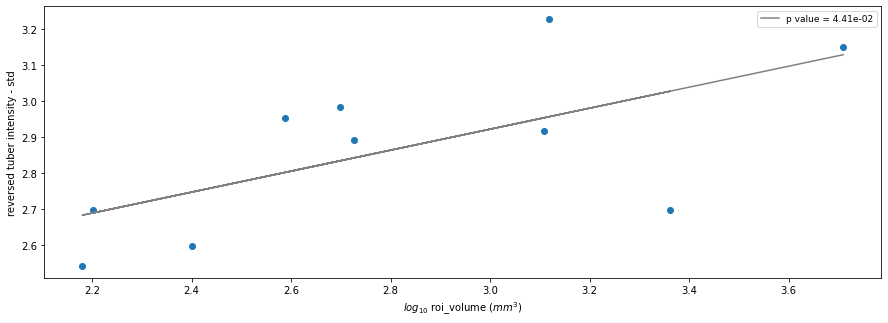

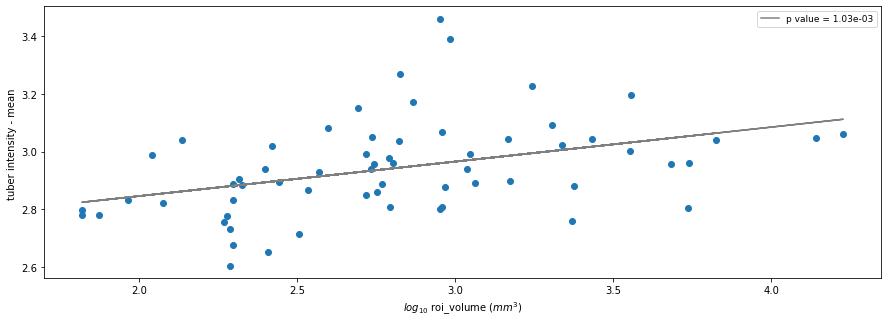

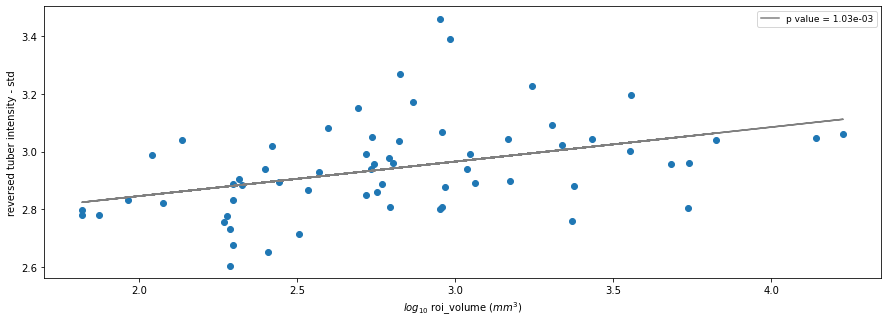

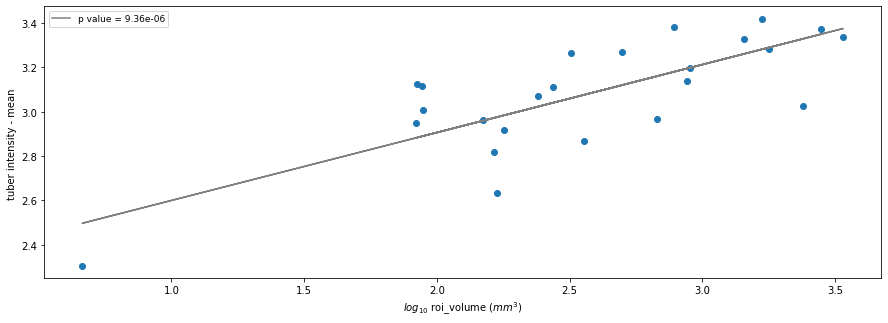

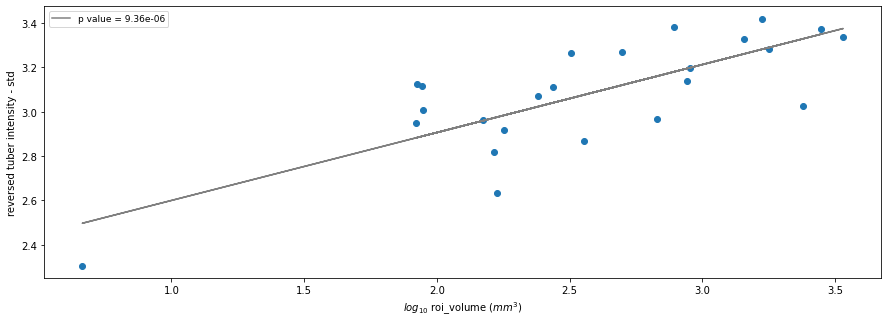

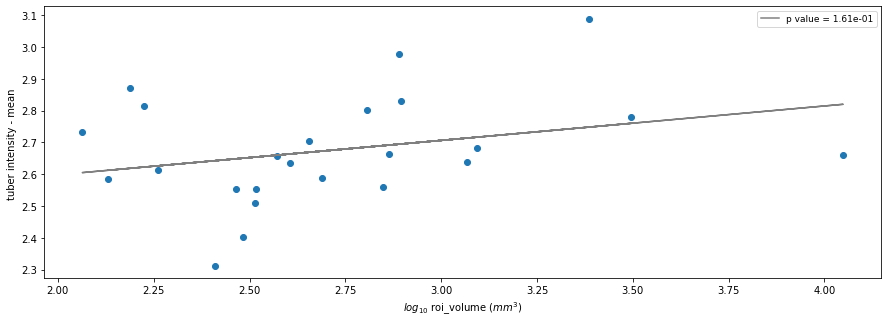

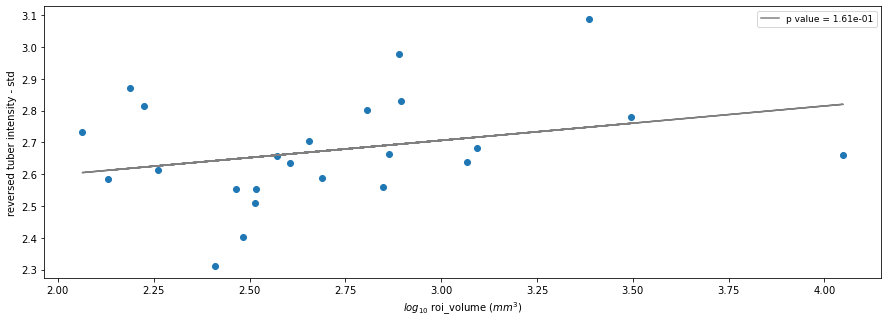

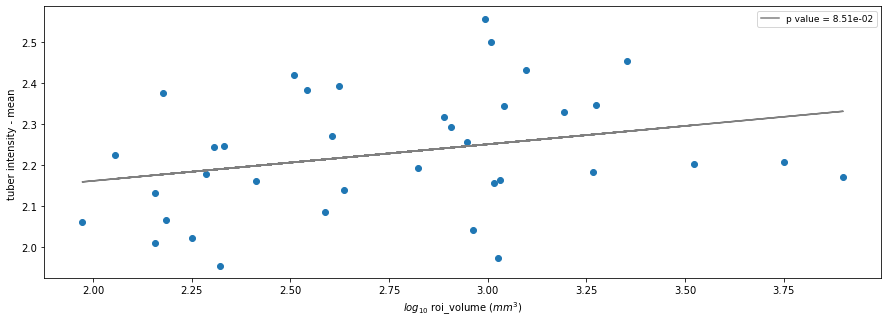

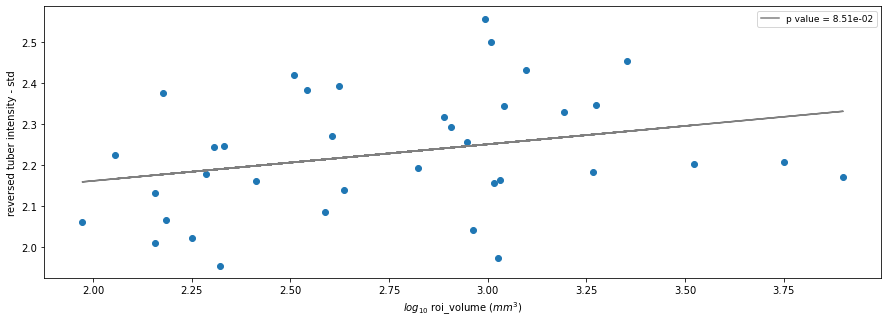

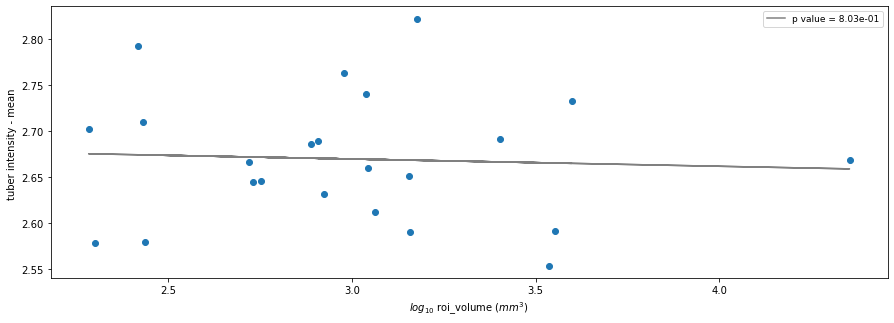

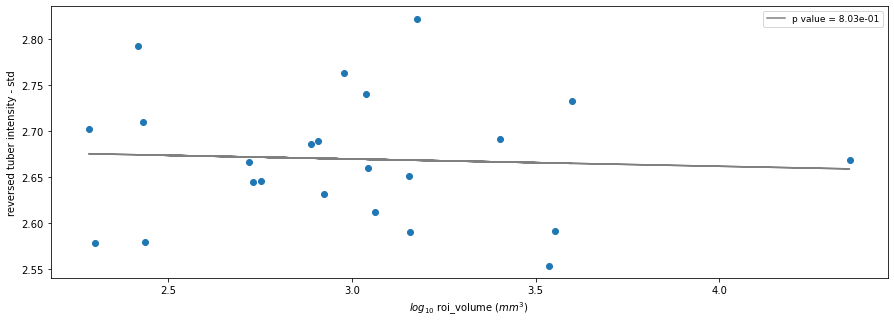

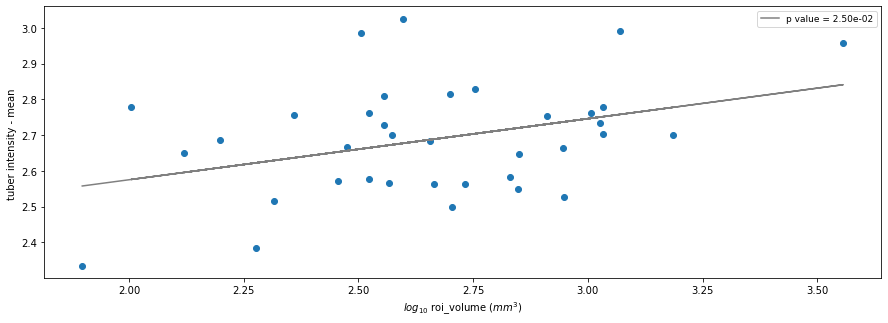

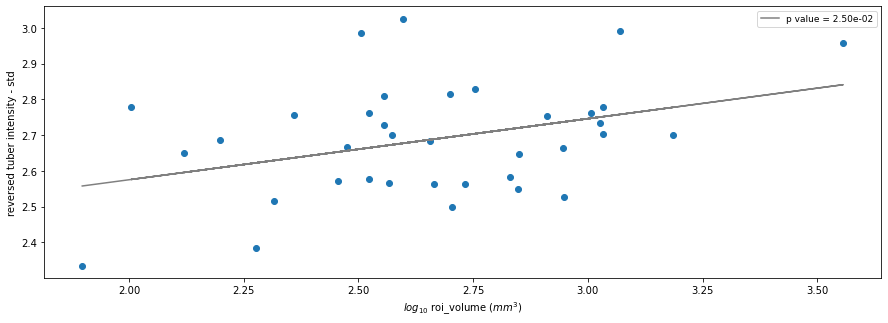

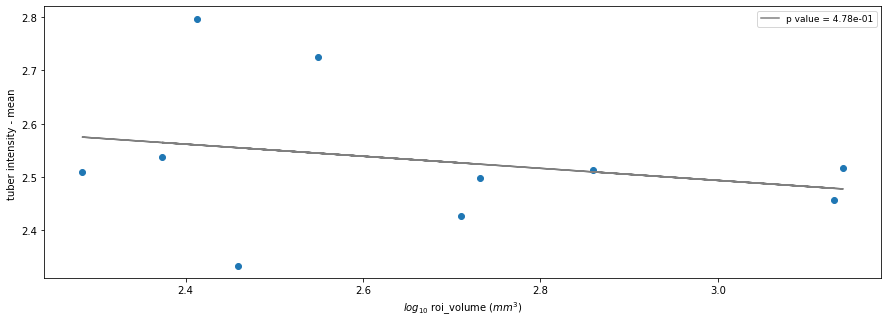

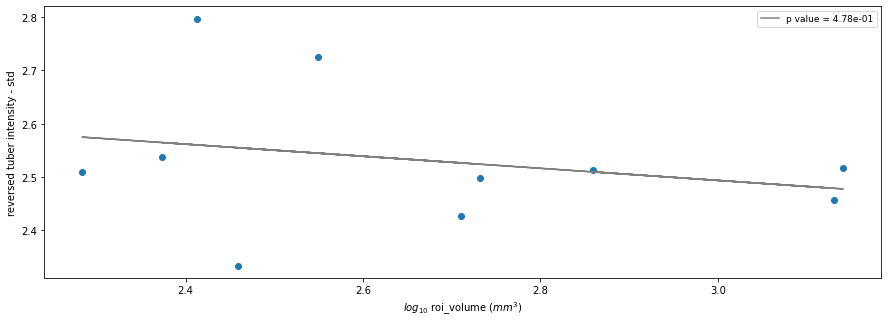

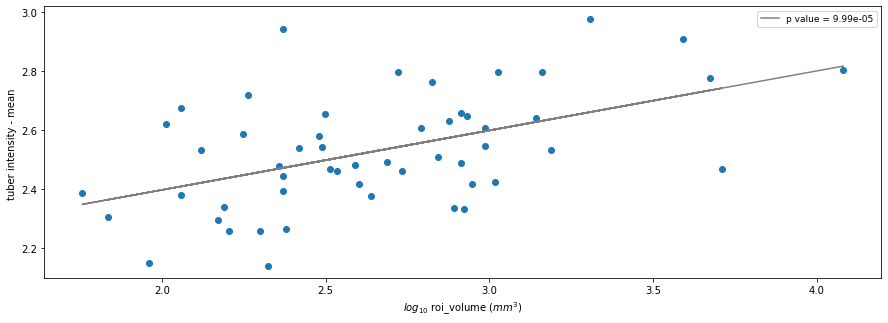

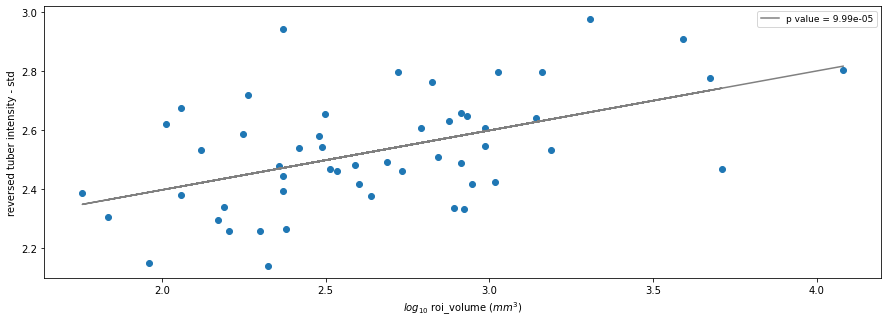

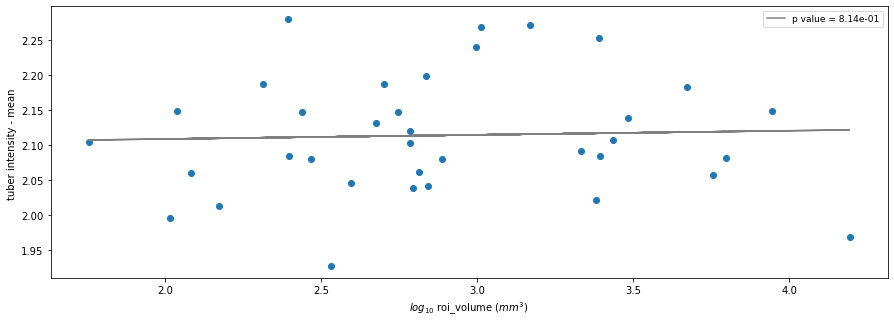

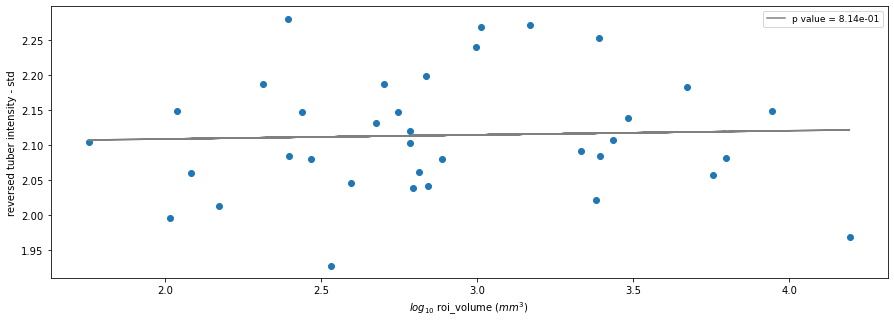

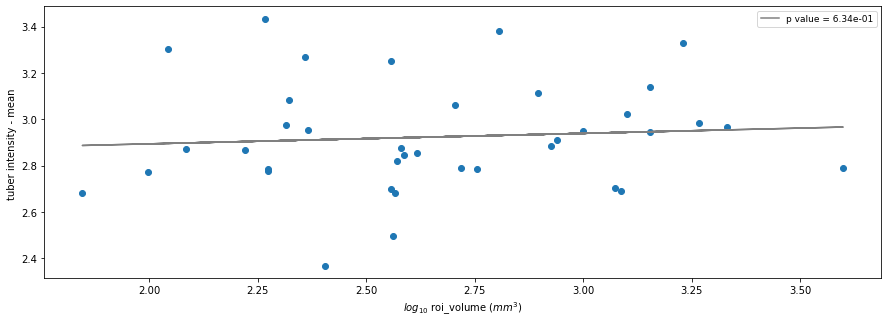

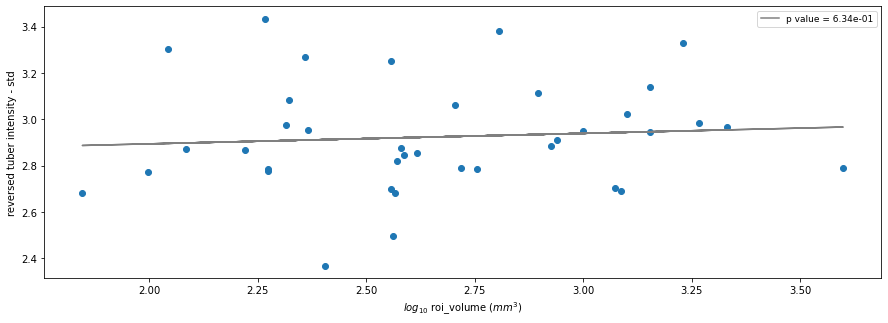

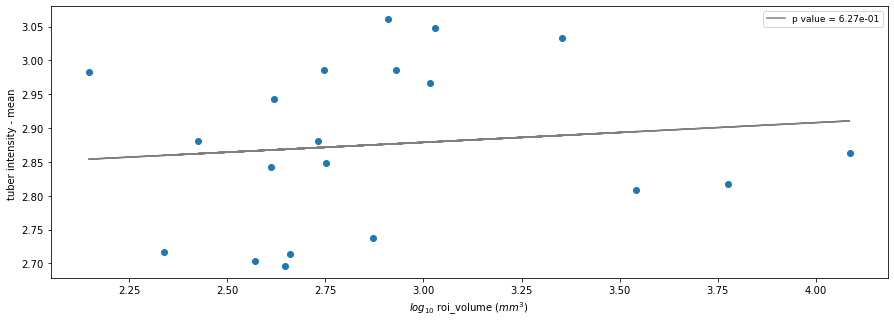

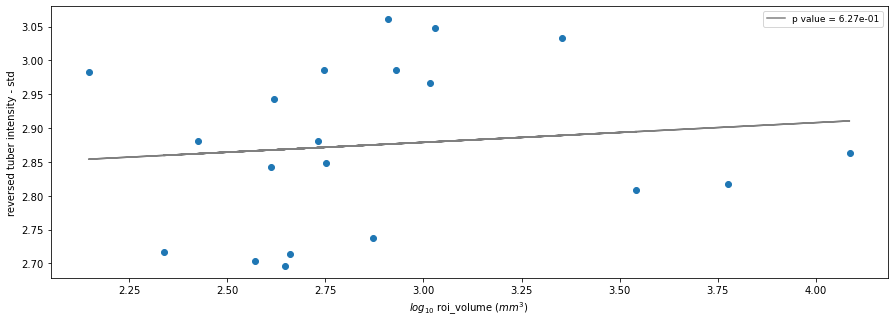

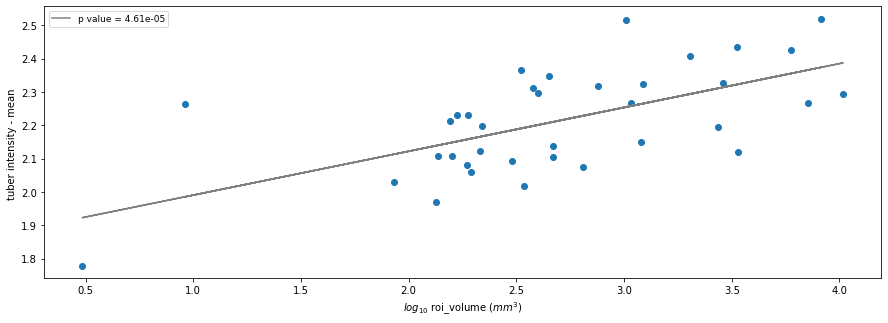

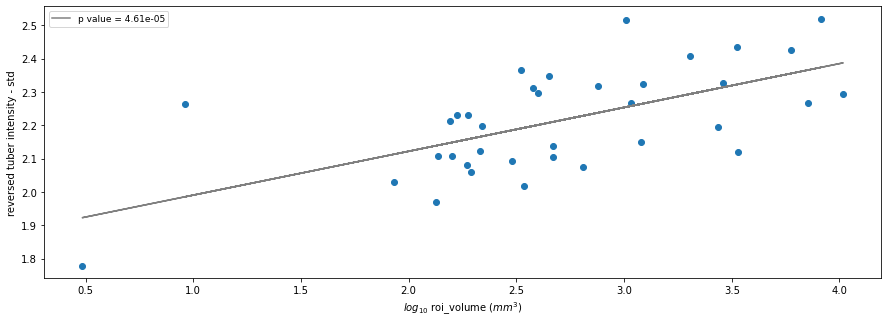

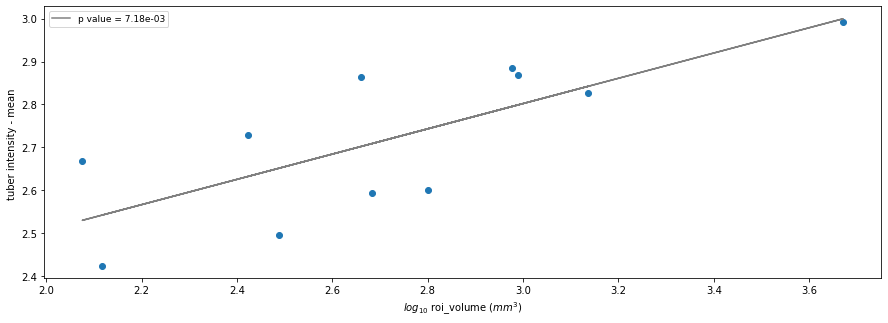

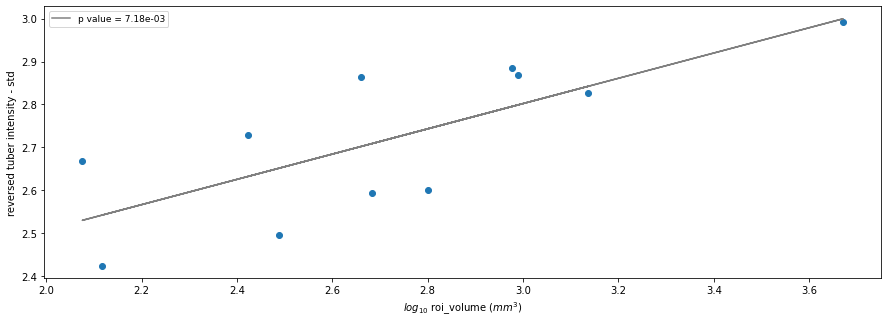

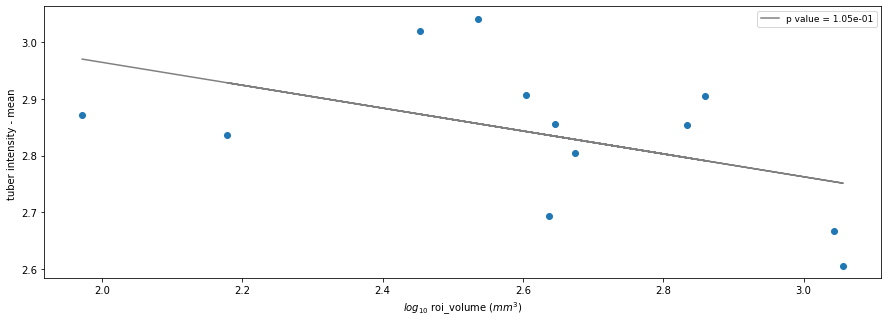

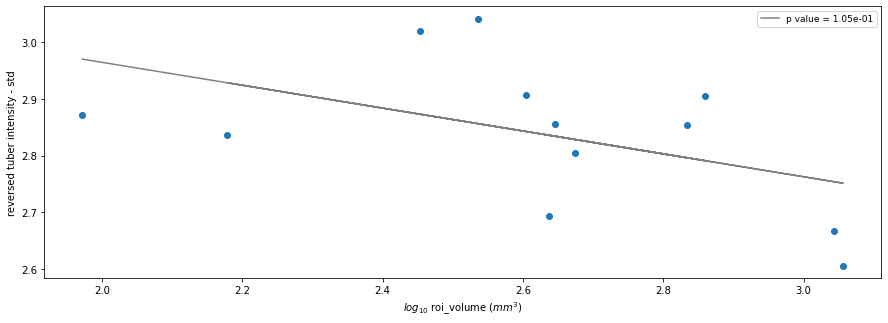

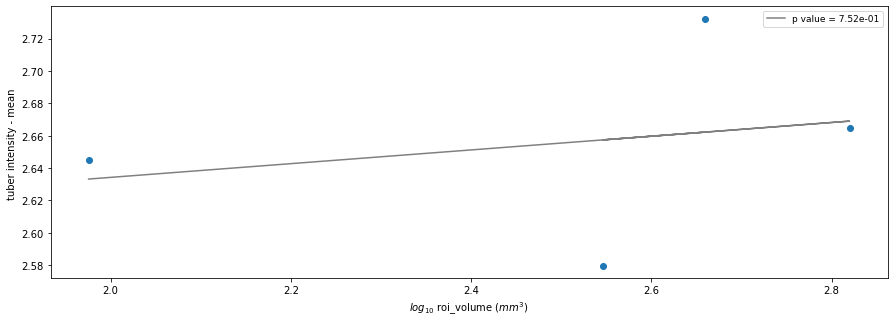

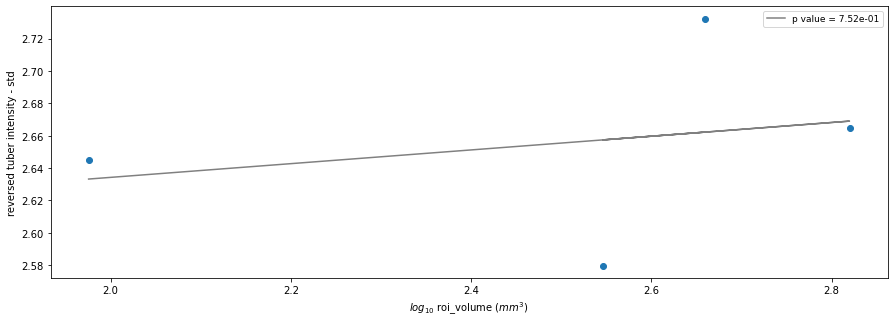

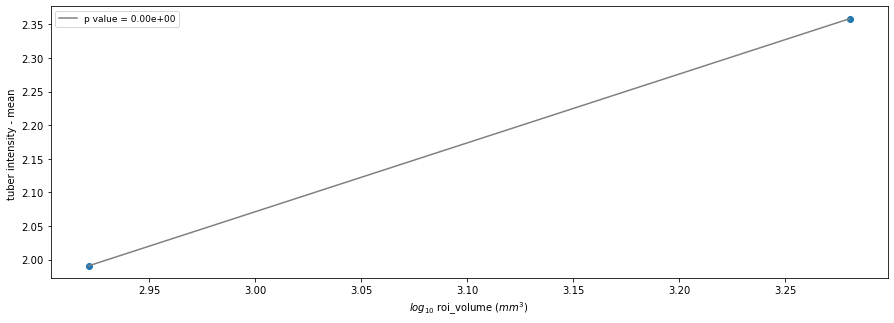

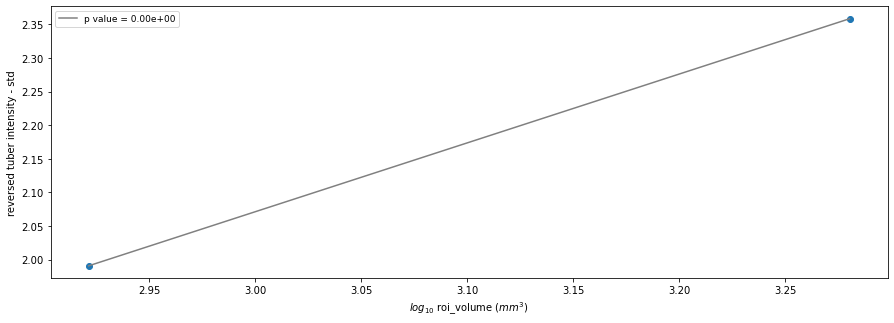

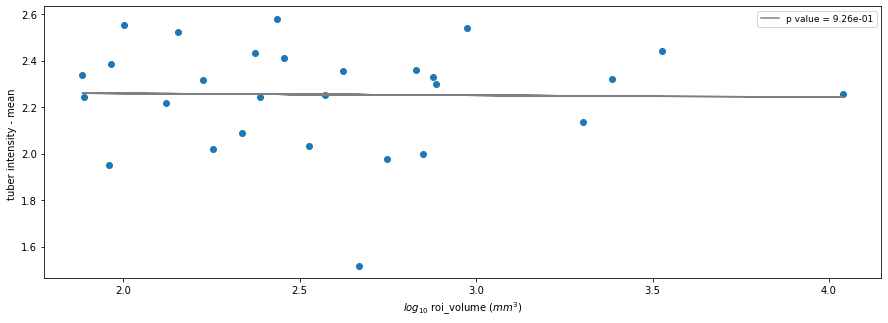

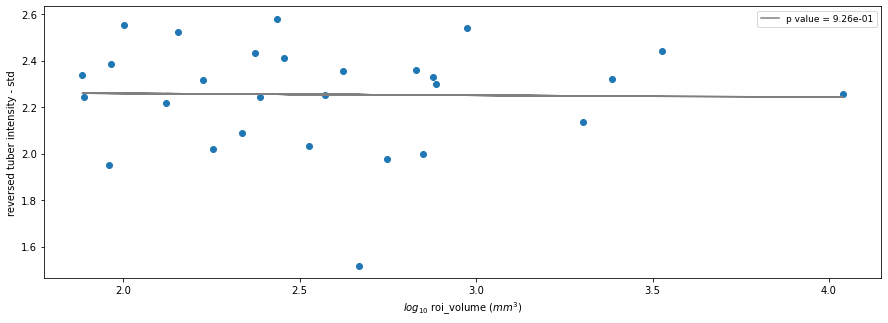

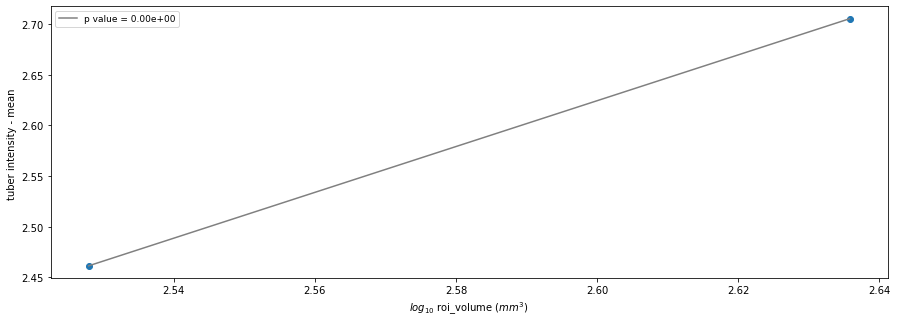

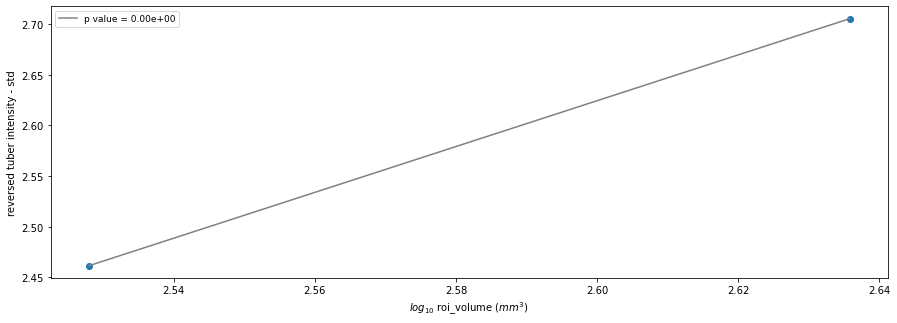

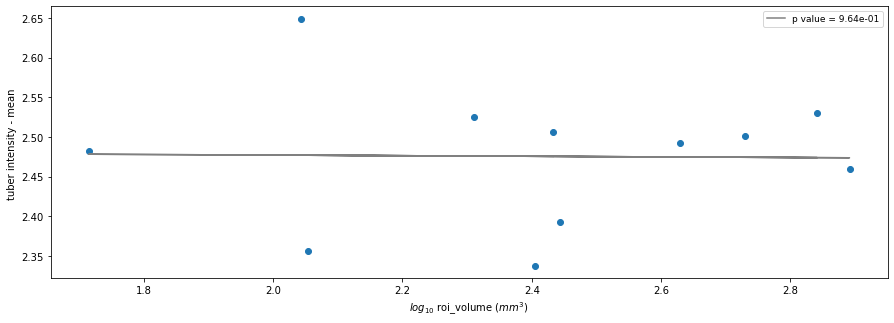

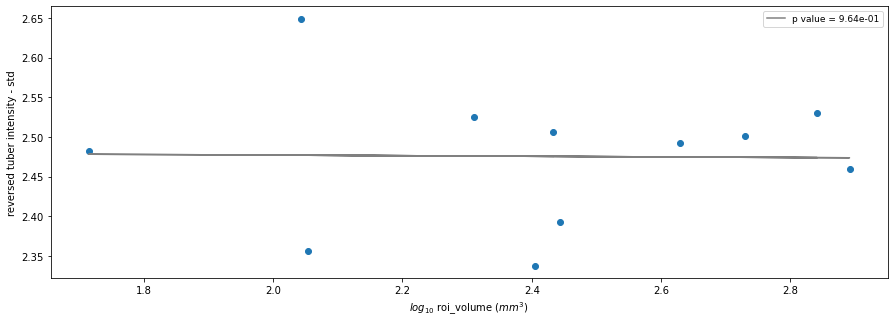

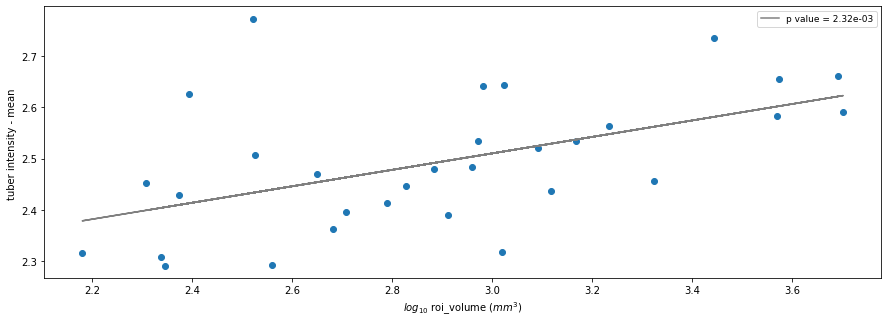

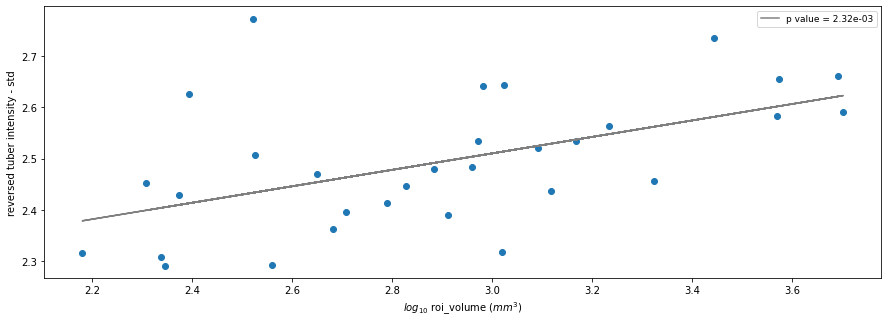

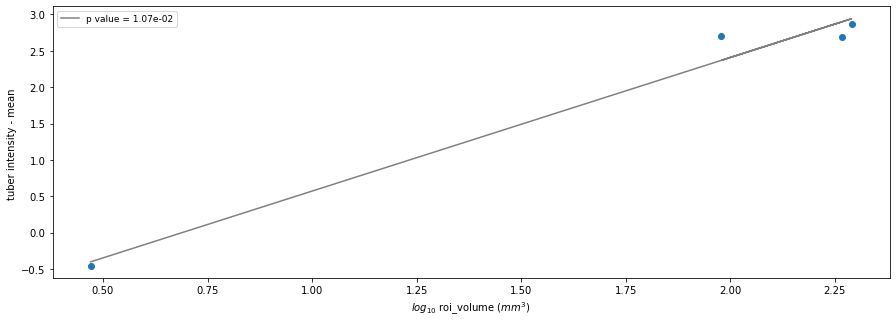

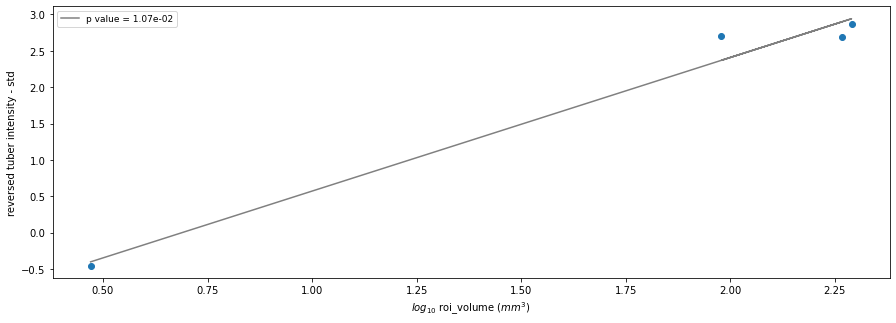

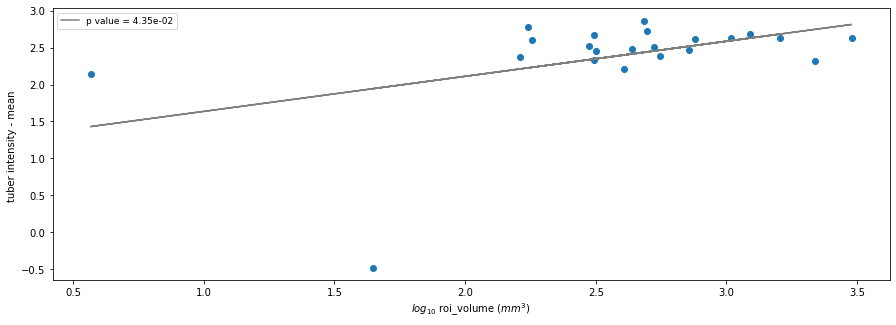

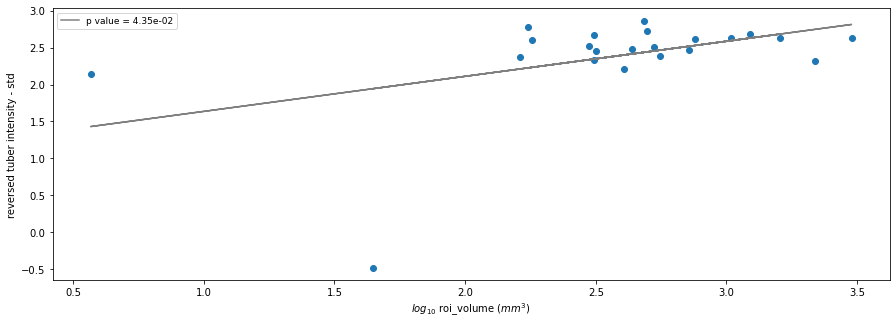

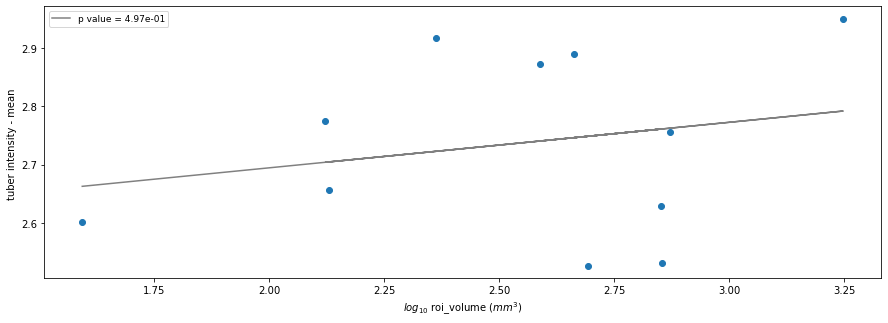

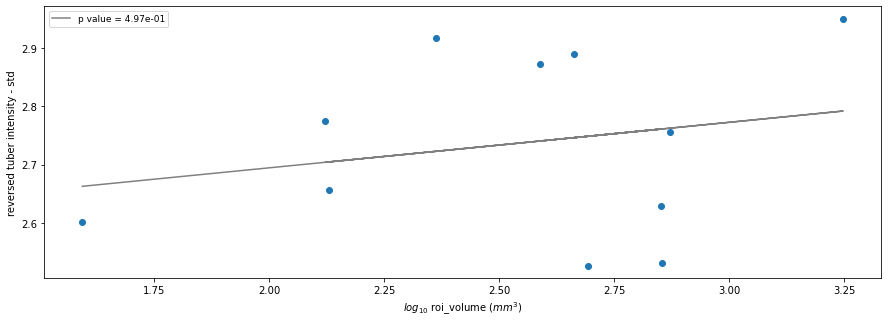

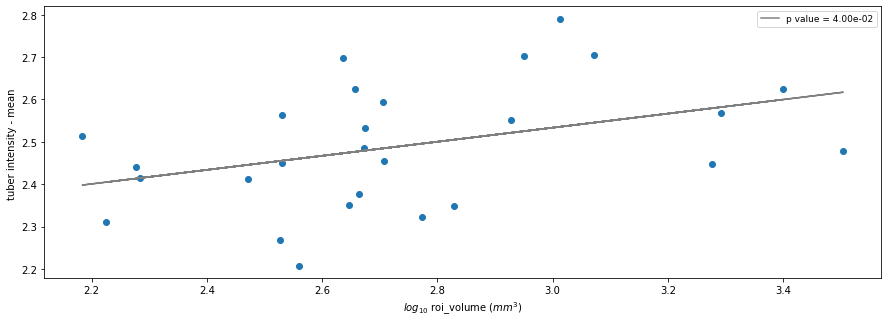

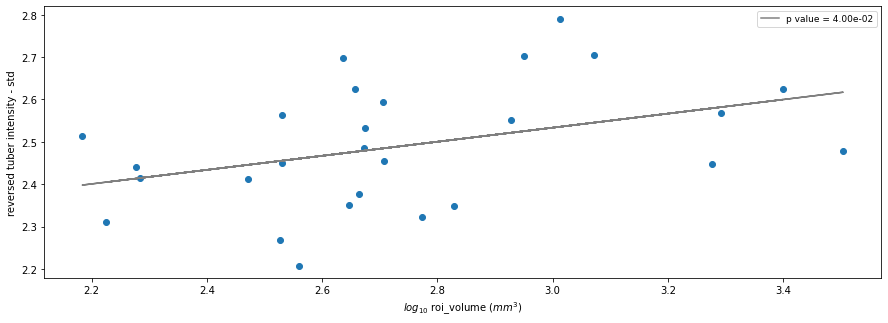

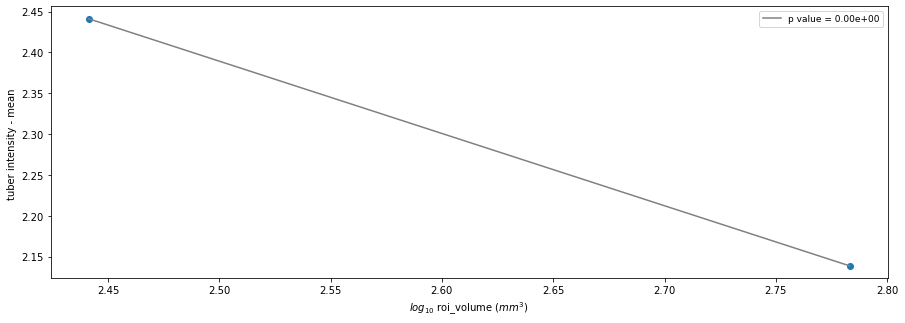

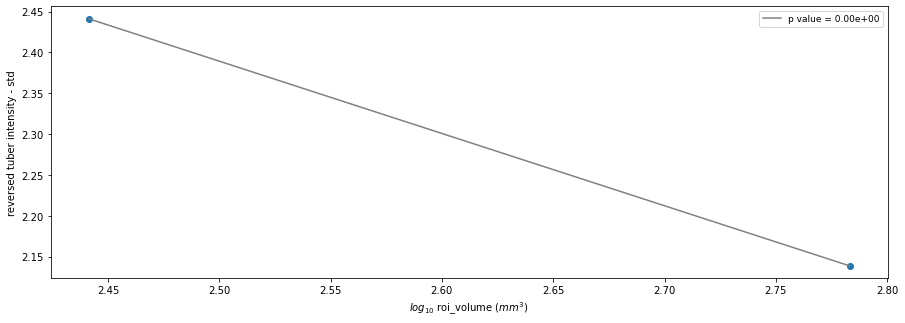

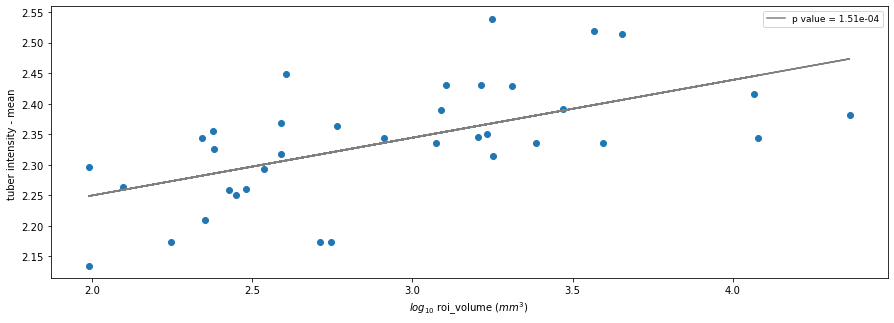

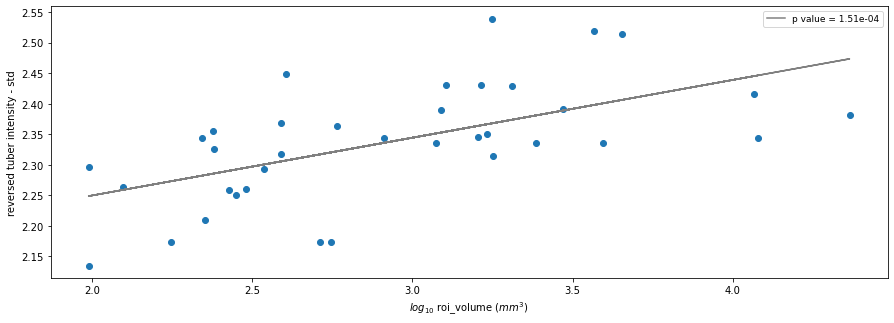

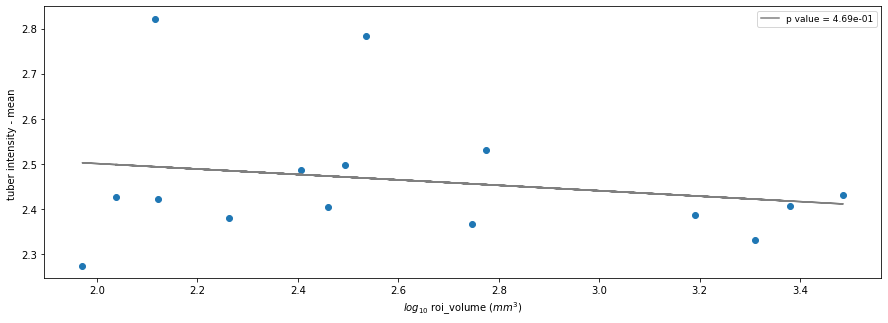

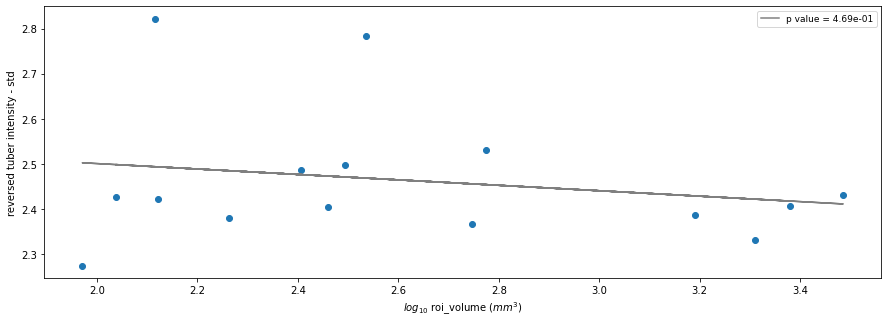

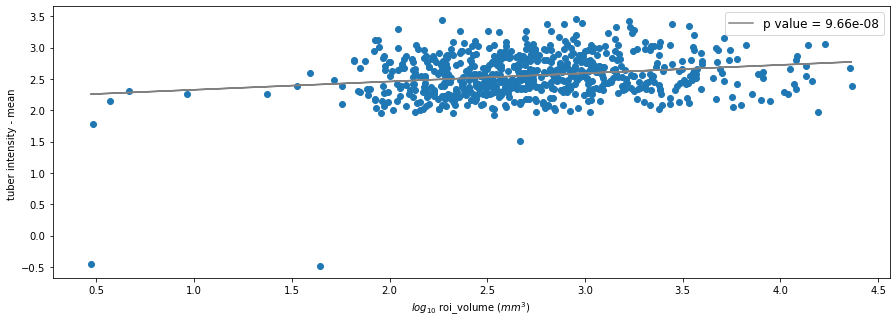

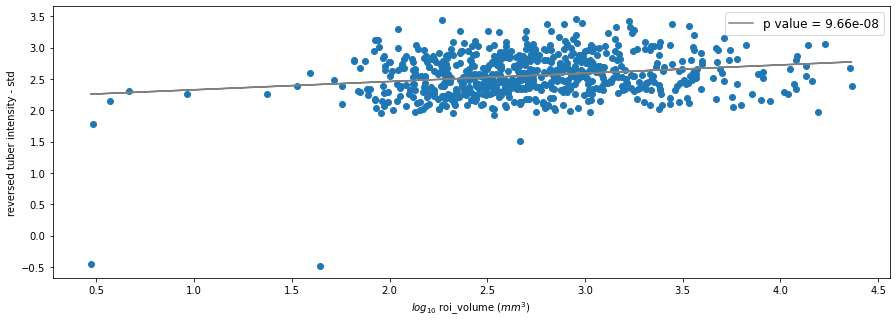

In [74]:
Analyzer.correlate_tuber_size_intensity(mod='all', group=True)